In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [3]:

sns.set(style="whitegrid")

In [9]:
df=pd.read_csv('/content/tested.csv')

In [10]:
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [11]:
df = df.dropna(subset=['Age', 'Fare'])


In [14]:
df = df.dropna(subset=['Age', 'Fare'])
df.head()

df.describe()
df.median(numeric_only=True)
df.std(numeric_only=True)
print("Skewness:\n", df.skew(numeric_only=True))
print("\nKurtosis:\n", df.kurt(numeric_only=True))
print("\nMode:\n", df.mode(numeric_only=True).iloc[0])



Skewness:
 PassengerId   -0.015918
Survived       0.480561
Pclass        -0.274764
Age            0.455808
SibSp          3.559734
Parch          2.777269
Fare           3.294238
dtype: float64

Kurtosis:
 PassengerId    -1.240482
Survived       -1.779852
Pclass         -1.551487
Age             0.108278
SibSp          20.436962
Parch          10.781955
Fare           14.171846
dtype: float64

Mode:
 PassengerId    892.0
Survived         0.0
Pclass           3.0
Age             21.0
SibSp            0.0
Parch            0.0
Fare            26.0
Name: 0, dtype: float64


In [15]:

numeric_cols = df.select_dtypes(include='number').columns.tolist()
print("Numeric columns:", numeric_cols)


Numeric columns: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


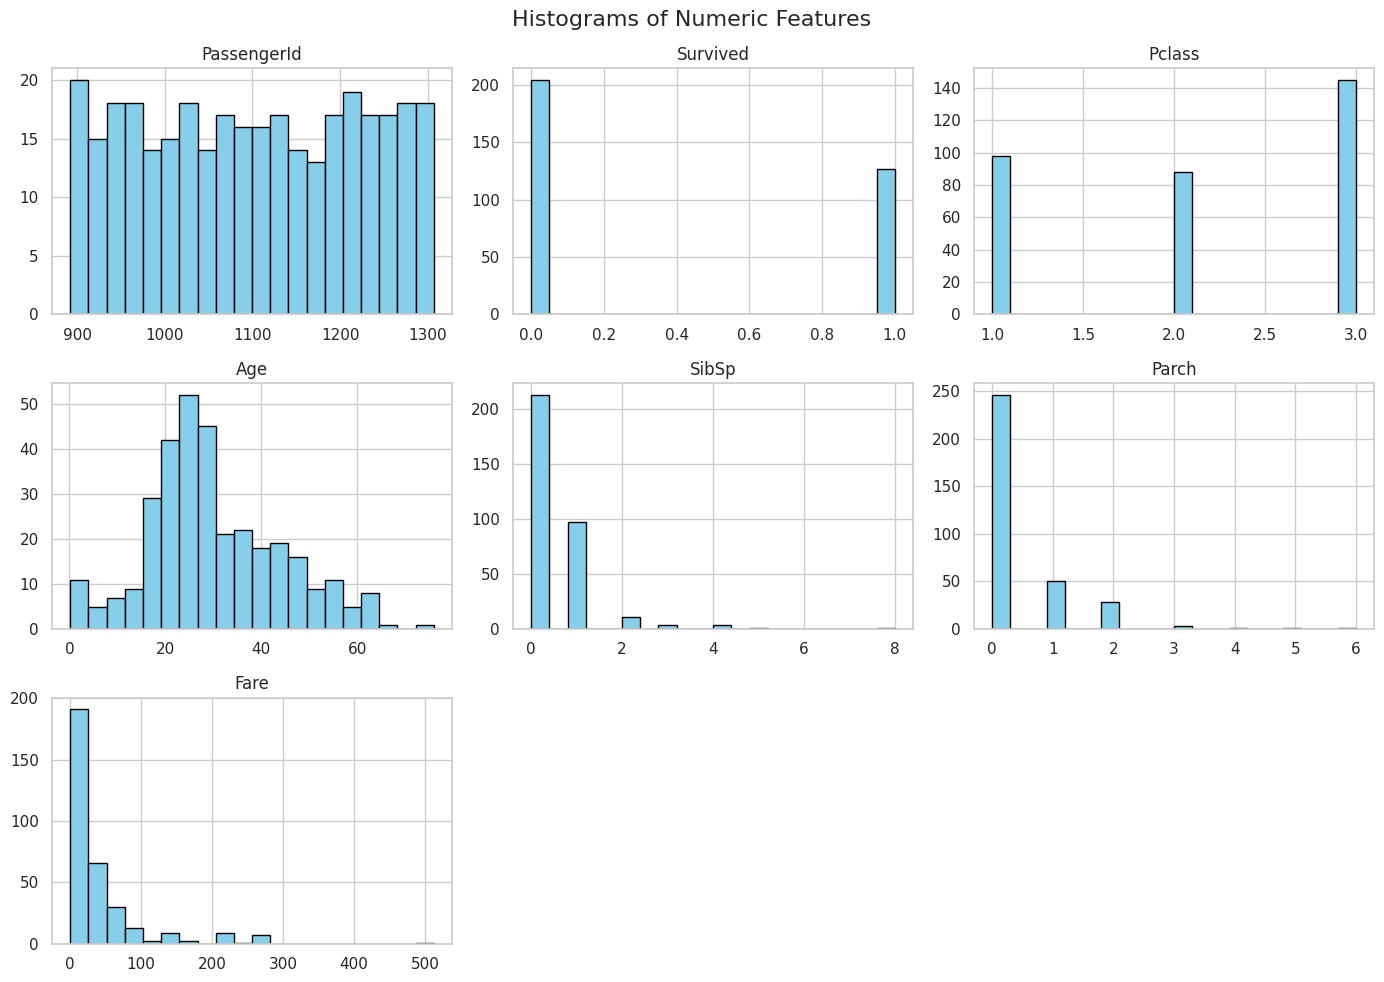

In [16]:
df[numeric_cols].hist(figsize=(14, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Numeric Features", fontsize=16)
plt.tight_layout()
plt.show()


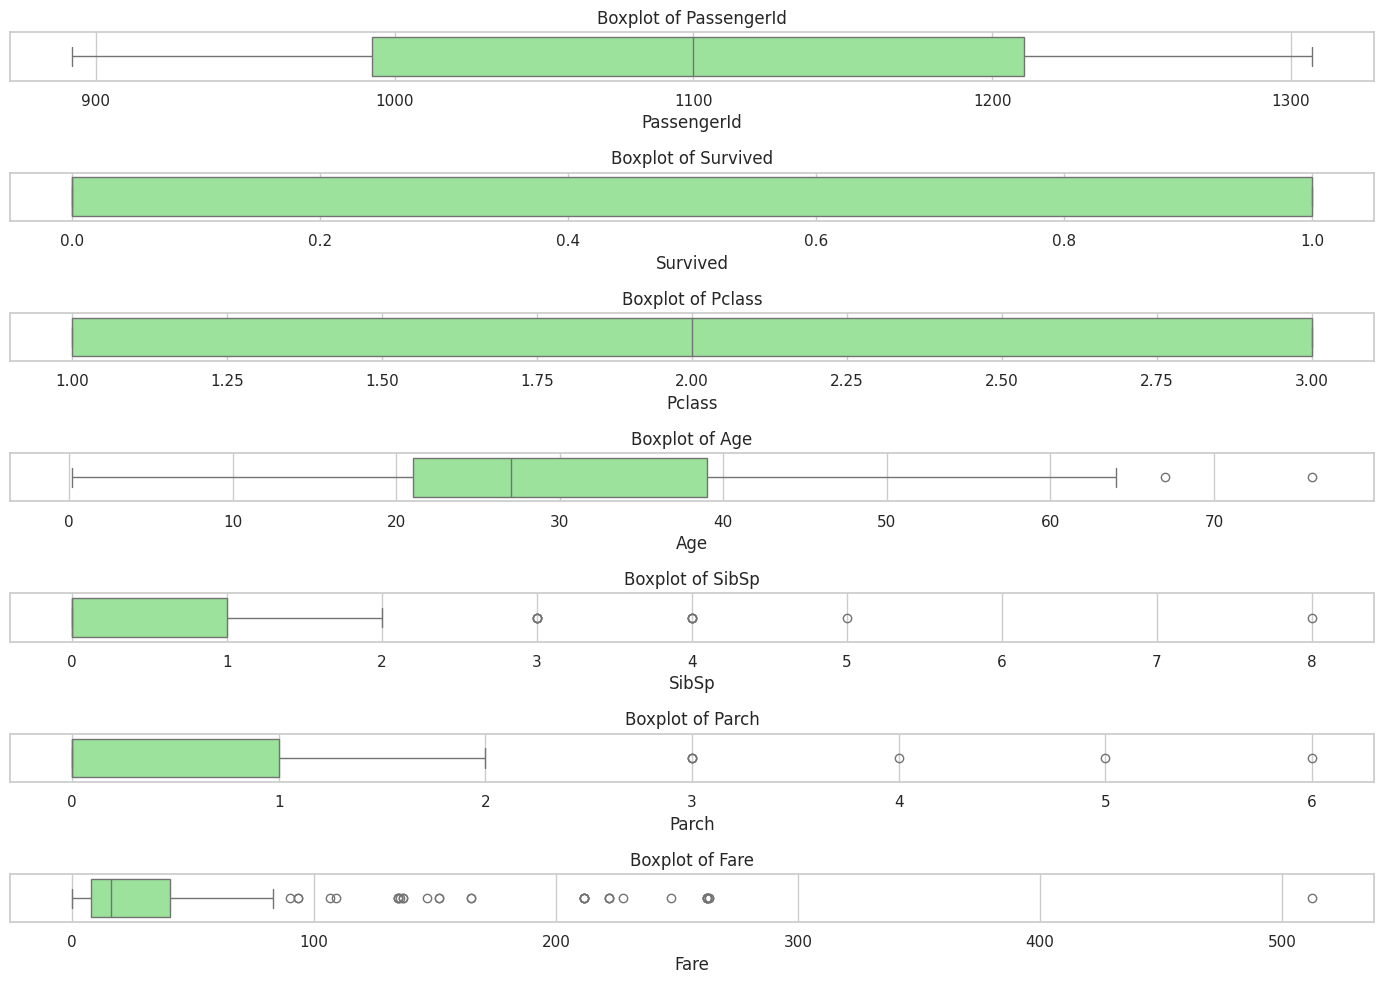

In [17]:
plt.figure(figsize=(14, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(len(numeric_cols), 1, i + 1)
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f"Boxplot of {col}")
    plt.tight_layout()

plt.show()

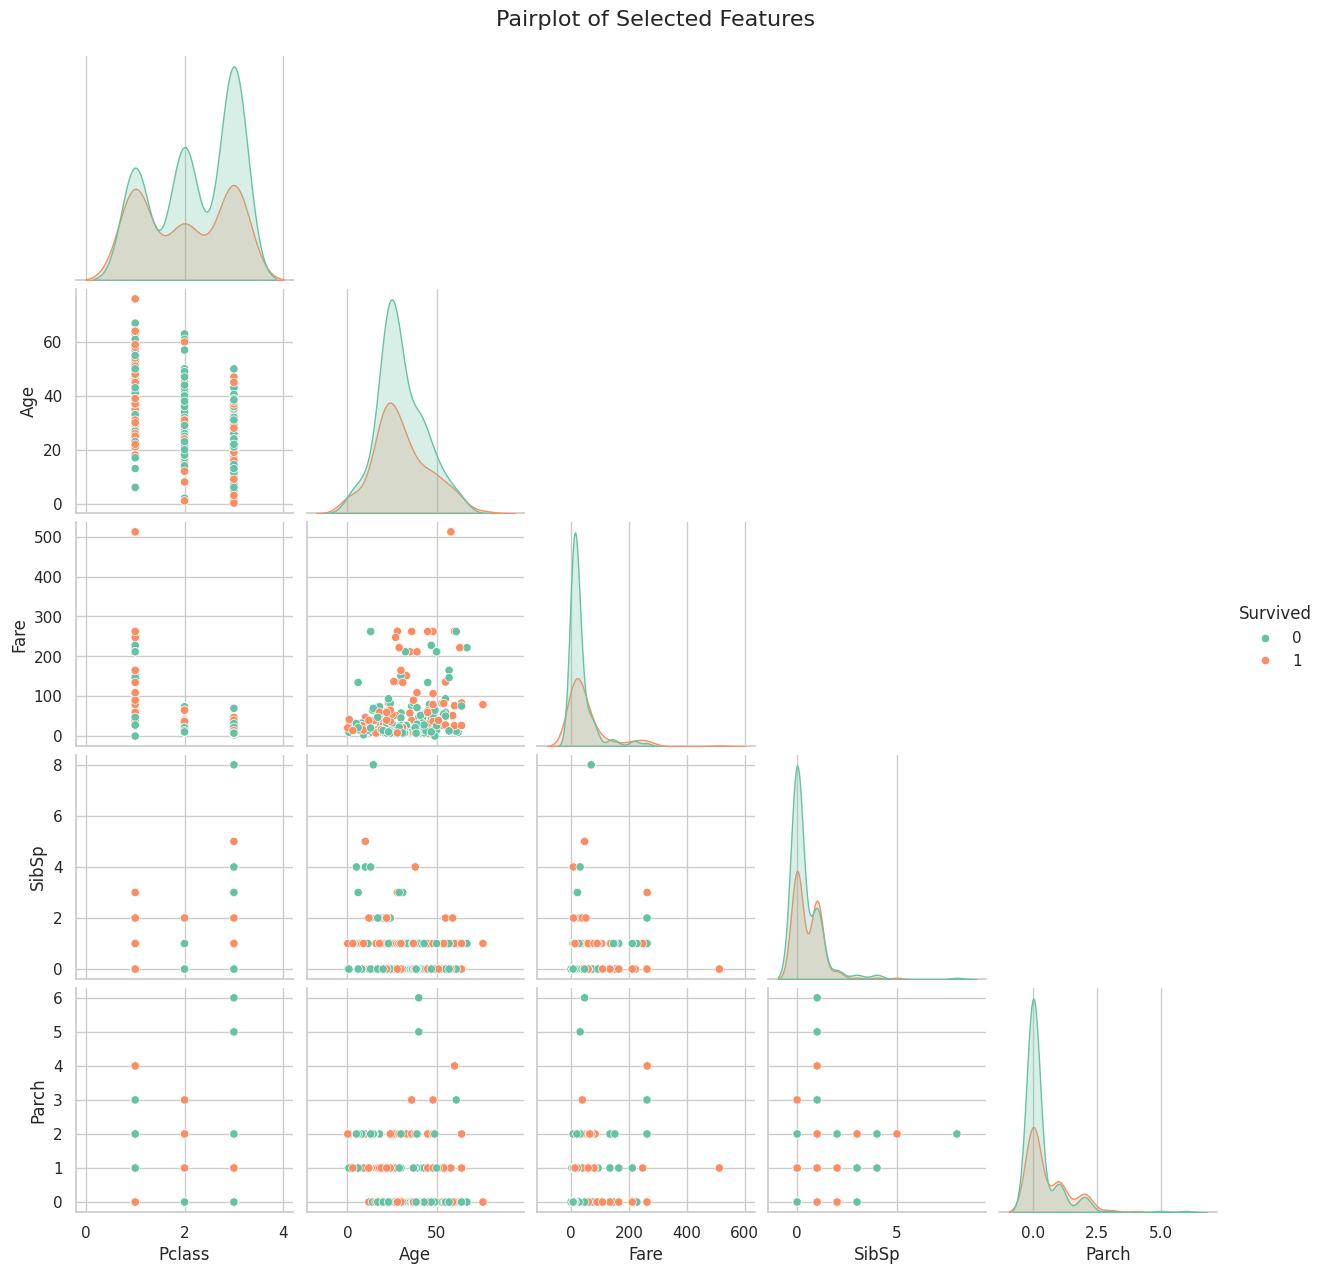

In [22]:
 selected_features = ['Survived', 'Pclass', 'Age', 'Fare', 'SibSp', 'Parch']


sns.pairplot(df[selected_features], hue='Survived', corner=True, palette='Set2')
plt.suptitle("Pairplot of Selected Features", y=1.02, fontsize=16)
plt.show()


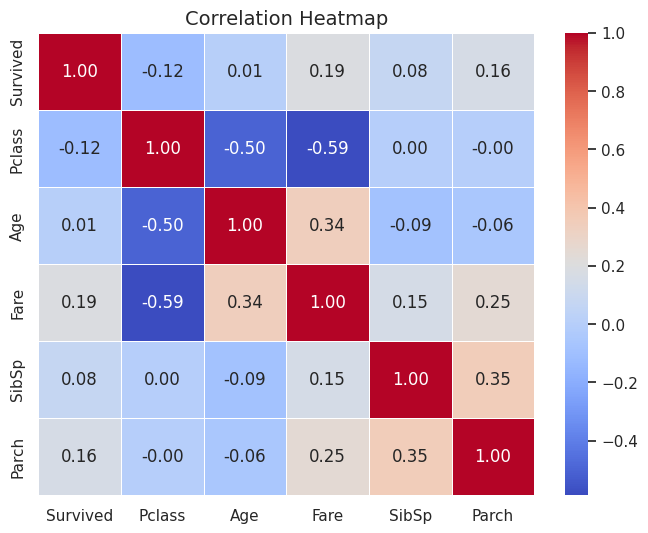

In [23]:
corr = df[selected_features].corr(numeric_only=True)

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=14)
plt.show()


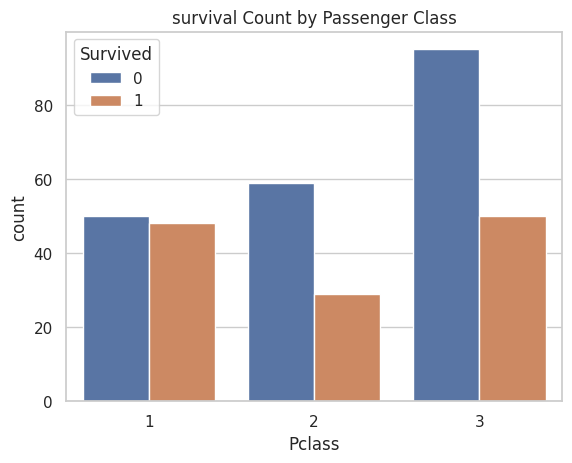

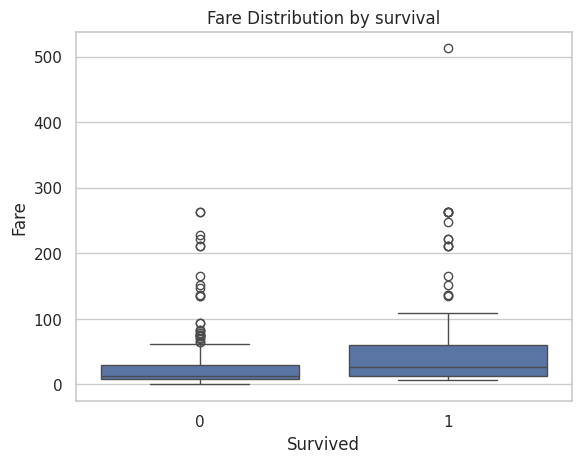

In [31]:
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title("survival Count by Passenger Class")
plt.show()


sns.boxplot(x='Survived', y='Fare', data=df)
plt.title("Fare Distribution by survival")
plt.show()


ValueError: The value for `multiple` must be one of ['layer', 'stack', 'fill', 'dodge'], but 'Stack' was passed.

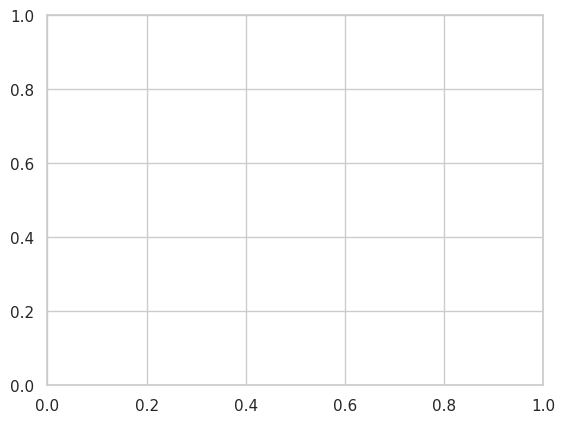

In [34]:
sns.histplot(data=df, x='Age', hue='Survived', bins=30, kde=True, multiple='Stack')
plt.title("Age Distribution by Survival")
plt.show()

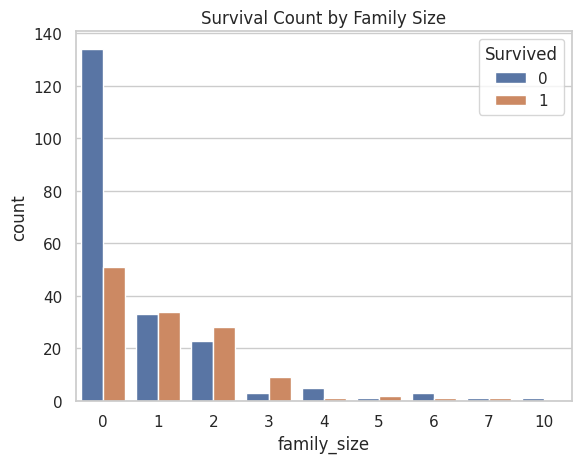

In [36]:
df['family_size'] = df['SibSp'] + df['Parch']

sns.countplot(x='family_size', hue='Survived', data=df)
plt.title("Survival Count by Family Size")
plt.show()

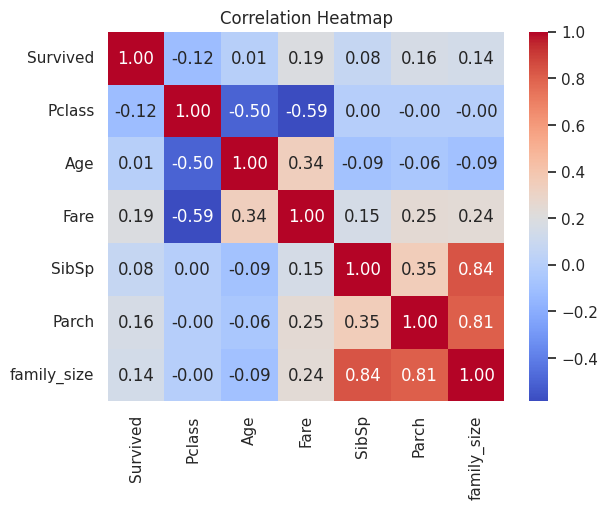

In [37]:
corr = df[['Survived', 'Pclass', 'Age', 'Fare', 'SibSp', 'Parch', 'family_size']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

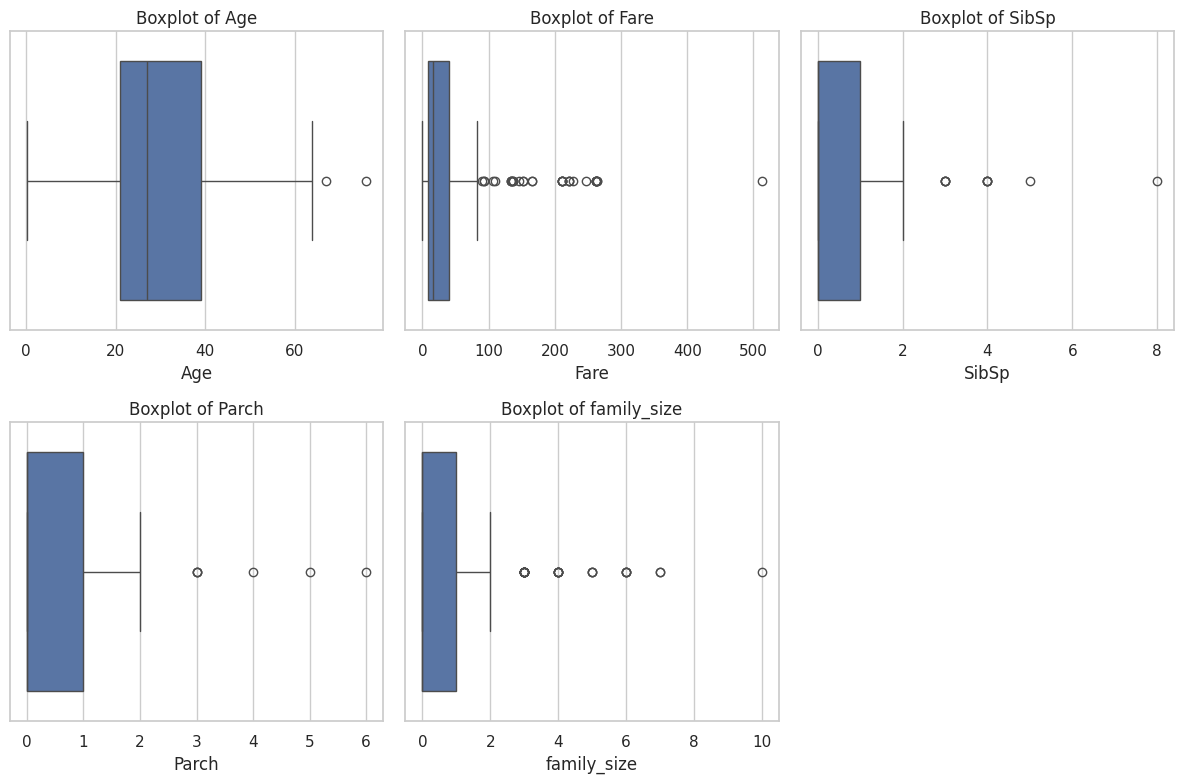

In [38]:
numeric_cols = ['Age', 'Fare', 'SibSp', 'Parch', 'family_size']

plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()


In [39]:
summary_stats = df.describe()


skewness = df.skew(numeric_only=True)
kurtosis = df.kurt(numeric_only=True)


mode_values = df.mode().iloc[0]


print("Summary Statistics:\n", summary_stats)
print("\nSkewness:\n", skewness)
print("\nKurtosis:\n", kurtosis)
print("\nMode:\n", mode_values)


Summary Statistics:
        PassengerId    Survived      Pclass         Age       SibSp  \
count   331.000000  331.000000  331.000000  331.000000  331.000000   
mean   1100.232628    0.383686    2.141994   30.181269    0.483384   
std     122.910180    0.487019    0.846251   14.104573    0.875004   
min     892.000000    0.000000    1.000000    0.170000    0.000000   
25%     992.500000    0.000000    1.000000   21.000000    0.000000   
50%    1100.000000    0.000000    2.000000   27.000000    0.000000   
75%    1210.500000    1.000000    3.000000   39.000000    1.000000   
max    1307.000000    1.000000    3.000000   76.000000    8.000000   

            Parch        Fare  family_size  
count  331.000000  331.000000   331.000000  
mean     0.398792   40.982087     0.882175  
std      0.811582   61.228558     1.386520  
min      0.000000    0.000000     0.000000  
25%      0.000000    8.050000     0.000000  
50%      0.000000   16.000000     0.000000  
75%      1.000000   40.633350    

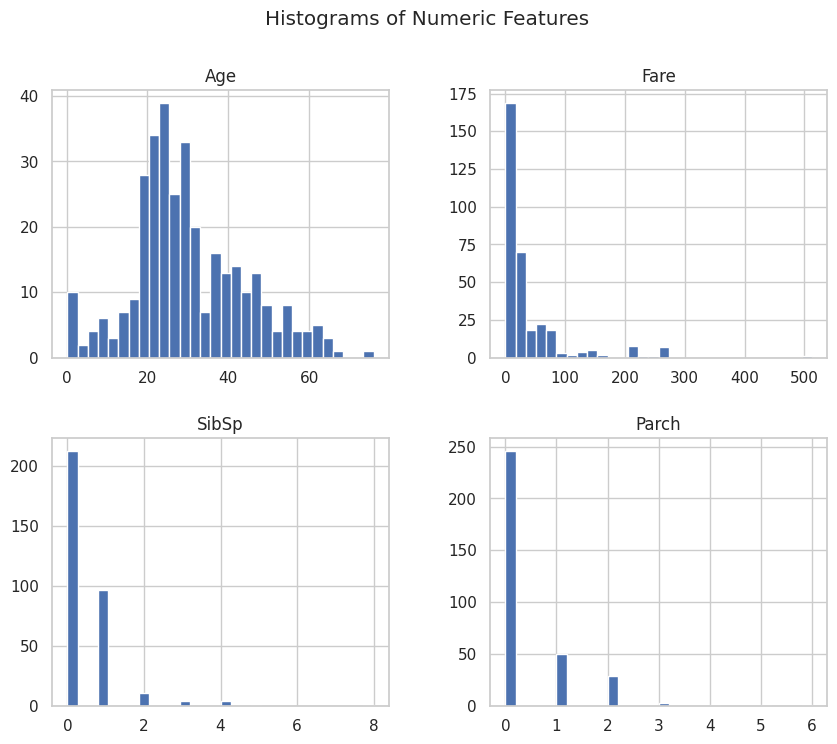

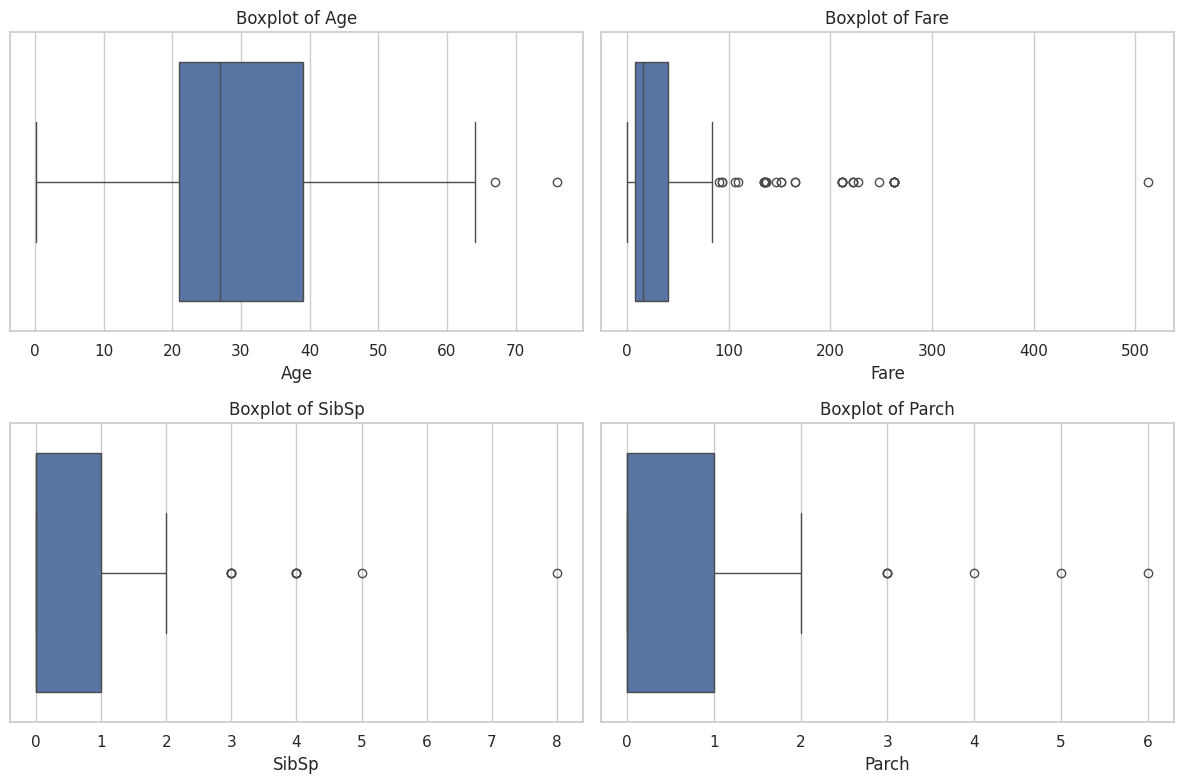

In [40]:
df[['Age', 'Fare', 'SibSp', 'Parch']].hist(bins=30, figsize=(10, 8))
plt.suptitle("Histograms of Numeric Features")
plt.show()


plt.figure(figsize=(12, 8))
for i, col in enumerate(['Age', 'Fare', 'SibSp', 'Parch']):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()


In [43]:
# Convert column names to lowercase
df.columns = df.columns.str.lower()

# Display the updated column names
print(df.columns)




Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked', 'family_size'],
      dtype='object')


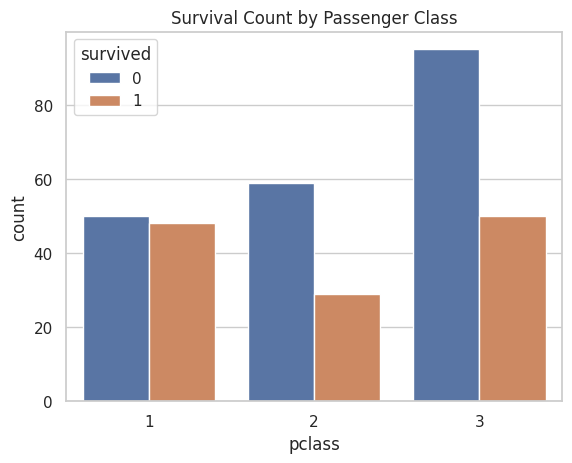

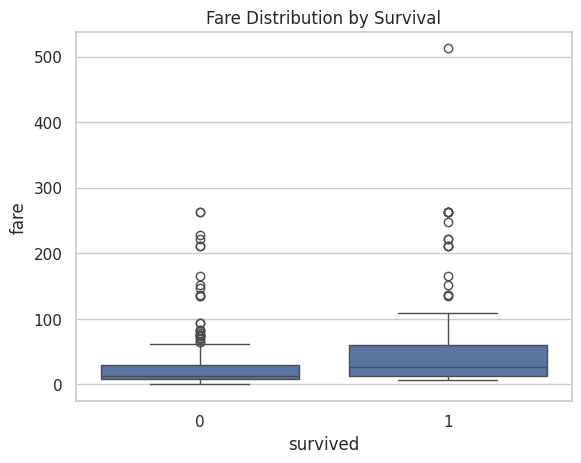

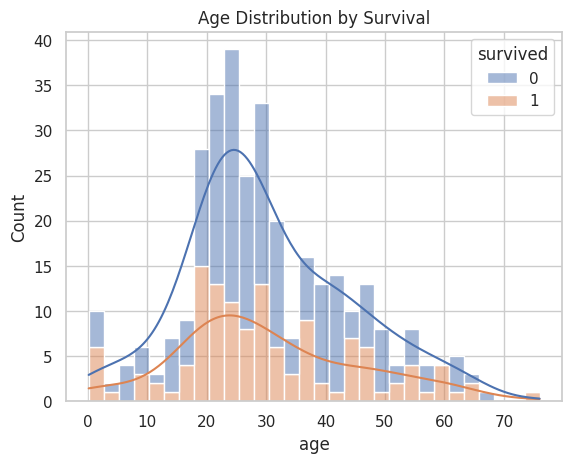

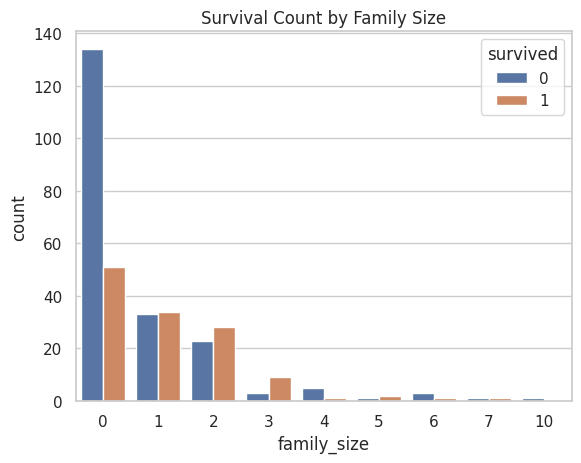

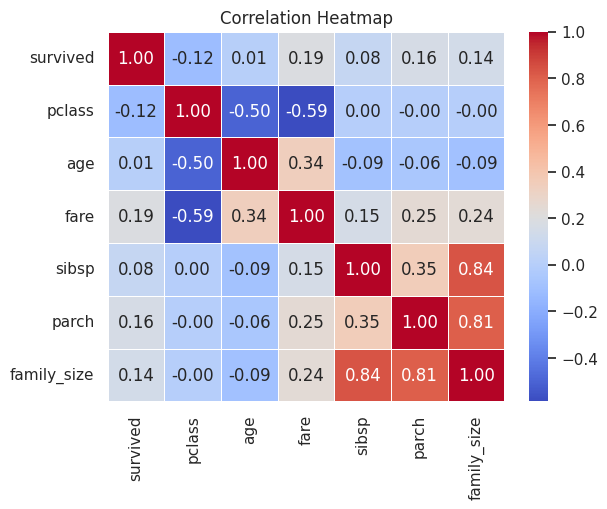

In [44]:
sns.countplot(x='pclass', hue='survived', data=df)
plt.title("Survival Count by Passenger Class")
plt.show()

sns.boxplot(x='survived', y='fare', data=df)
plt.title("Fare Distribution by Survival")
plt.show()

sns.histplot(data=df, x='age', hue='survived', bins=30, kde=True, multiple='stack')
plt.title("Age Distribution by Survival")
plt.show()


df['family_size'] = df['sibsp'] + df['parch']
sns.countplot(x='family_size', hue='survived', data=df)
plt.title("Survival Count by Family Size")
plt.show()


corr = df[['survived', 'pclass', 'age', 'fare', 'sibsp', 'parch', 'family_size']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()
